
<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/Sesion_01a_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución a un problema general de machine learning

En esta sesión se trabajará con las datos de los precios de las casas de california para dar solución a un problema real

Referencia: Basado del libro  [hand on machine learning](https://github.com/ageron/handson-ml) y [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices)



1. Generar una visión general del problema
2. Obtener los datos 
3. Explorar los datos
4. Descubrir y visualizar los datos
5. Preparar los datos para un algoritmo de machinine learning
6. Selecccionar los modelos 
7. Elegir el mejor modelo tuneando los parametros de ajuste
8. Presentar la solucion 
9. Moniterar y analizar los datos.

https://www.kaggle.com/rahulallakonda/california-housing


# Data.

1. Leer los datos
2. Analizar el estado de los datos
3. Limpiar los datos.
4. Analizar los datos.


```

import pandas as pd

# Read data
df.read_csv("")
df.read_excel(")

# Entender los datos
df.head()
df.info()
df.describe()
df["name_columns"].unique()
df.isnull().sum()
df.isnan().sum()
df.groupby(by=["name_cols"]).mean()
df.groupby(by=["name_cols"]).count()
df.groupby(by=["name_cols"]).sum()
df.hist()

```

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [ ]:
#Si no recuerda los comandos de pandas, puede ver una cheat sheet 
#https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

data_link = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(data_link)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value","ocean_proximity"]
df[cols].groupby(by=["ocean_proximity"]).mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


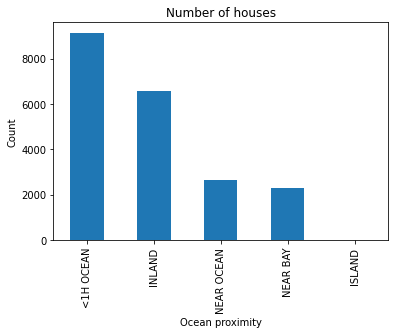

In [ ]:
df.ocean_proximity.value_counts().plot(kind="bar")
plt.title('Number of houses')
plt.xlabel("Ocean proximity")
plt.ylabel('Count')
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff668d3ead0>,
      dtype=object)

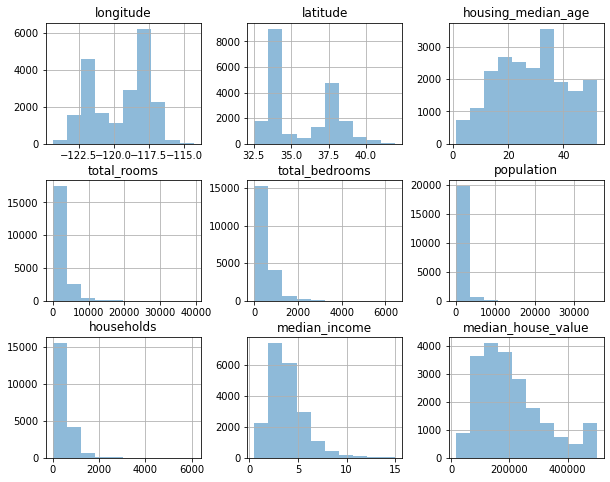

In [ ]:
df.hist(alpha=0.5, figsize=(10,8))

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja 

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos 
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos 
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos 
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos 


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atipicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$


Veamos un ejemplo:


T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]
88.5
52.5


{'boxes': [<matplotlib.lines.Line2D at 0x7ff669b70e90>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff669c9ce10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff66ec60350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff67763c4d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff669b707d0>,
  <matplotlib.lines.Line2D at 0x7ff669b8d5d0>]}

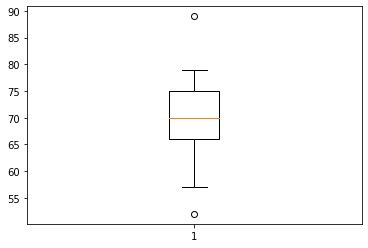

In [ ]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(f"T sort:{Tsort}")

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

 volviendo a nuestro datos tenemos que:

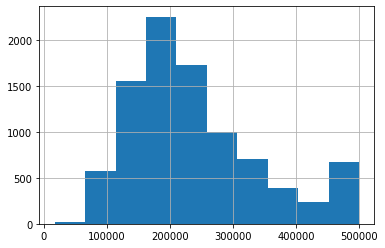

In [ ]:
df2 = df[df["ocean_proximity"] == "<1H OCEAN"]
df2["median_house_value"].hist()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


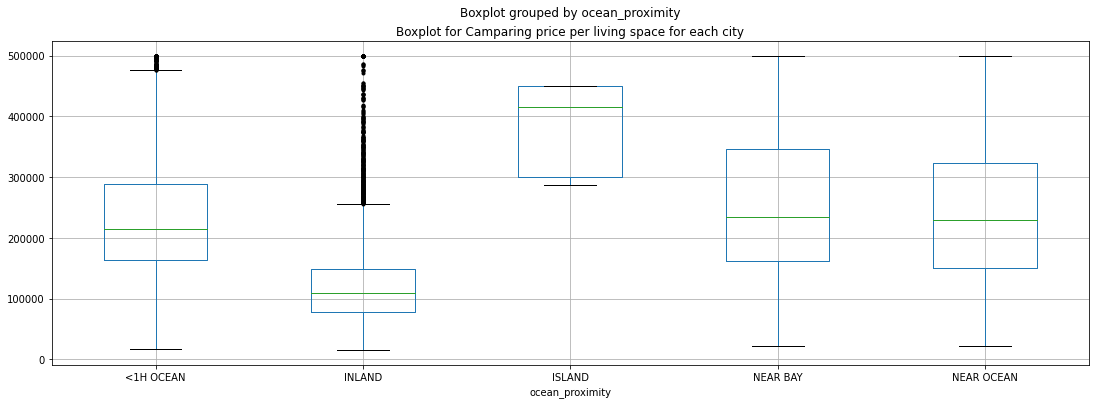

In [ ]:
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for Camparing price per living space for each city')
plt.show()

## [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()
```


In [ ]:
corr_matrix = df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


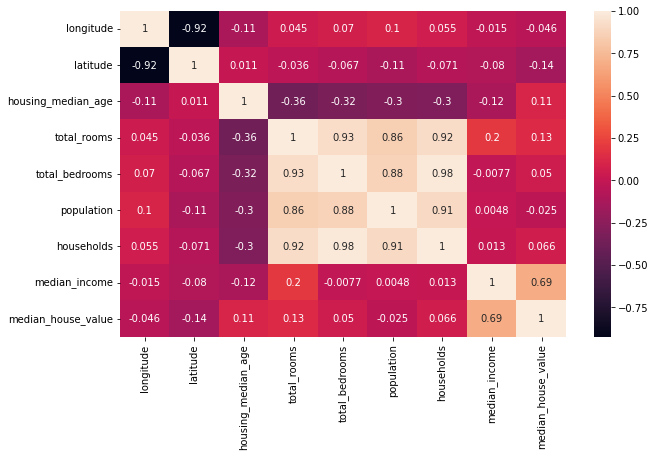

In [ ]:
# Visualización de la matrix de correlación
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

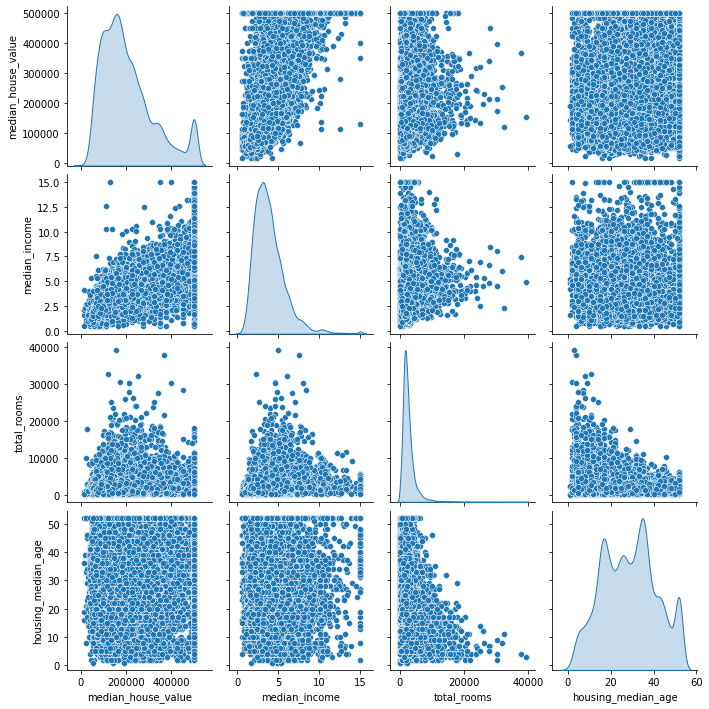

In [ ]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
#pd.plotting.scatter_matrix(df[cols], alpha = 0.2, figsize = (12,8))
g = sns.pairplot(df[cols], diag_kind="kde")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


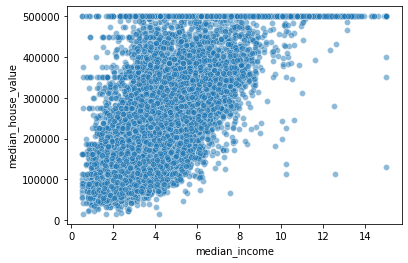

In [ ]:
ax = sns.scatterplot(df.median_income, df.median_house_value, alpha = 0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


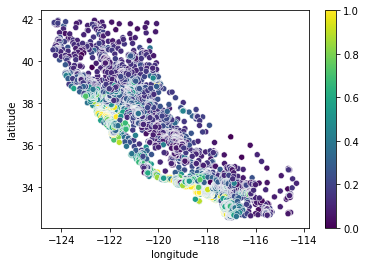

In [ ]:
#sns.set()
#tips = sns.load_dataset("tips")

ax = sns.scatterplot(df.longitude,df.latitude, c=df.median_house_value)
sm = plt.cm.ScalarMappable()
ax.figure.colorbar(sm)

In [ ]:
# cols=df.columns
# cols
# fig, axs = plt.subplots(3, 3, figsize=(10,10))
# fig.add_gridspec(3, 3, hspace=10, wspace=40)
# k = 0
# for i in range(0,3):
#     for j in range(0,3):        
#         sns.histplot(df[cols[k]],ax=axs[i, j])
#         #sns.kdeplot(df[cols[k]], ax=axs[i, j],color="b")        
#         axs[i, j].legend(fontsize = 8)        
        
#         if(j==0):
#           axs[i, j].set_ylabel("")
#         if(i==2):
#           axs[i, j].set_xlabel("")
#         k=k+1


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# Combinar caracteristics puede ser una buena forma de definir nuevas variables y mejorar
# los entrenamientos del algoritmo.

# Preparación de data para un algoritmo de machine learning 

# Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar la hipótesis. 


# *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento. 


Ejemplo: 

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.



In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

In [ ]:
# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

In [ ]:
print(len(train_set))
print(len(test_set))

16512
4128


In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### División del dataset en grupos
La siguiente division debe ser basada en la experticie de lo que se esta realizando, y sobre ello se debe tomar una muestra significativa

In [ ]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

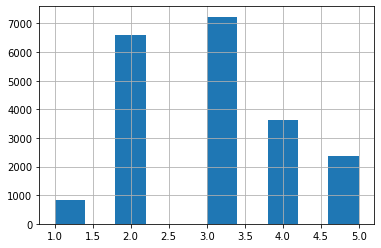

In [ ]:
df.income_cat.hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]


### Proporciones del dataset

In [ ]:
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [ ]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [ ]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)


In [ ]:
test_set["income_cat"].value_counts() / len(test_set)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [ ]:
test_set["income_cat"].value_counts() / len(test_set)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [ ]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


En Conclusion

In [ ]:
#Si no recuerda los comandos de pandas, puede ver una cheat sheet 
#https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
data_link = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(data_link)

#1. Leer los data. 
#2. Para hacer el split analizar si la muestra es significativa para el entrenamiento y test
#3. Dejar los data de test ocultos para hacer las pruebas

In [ ]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [ ]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

df_train = strat_train_set
df_test = strat_test_set

## Matrix de correlación

In [ ]:
corr_matrix = df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

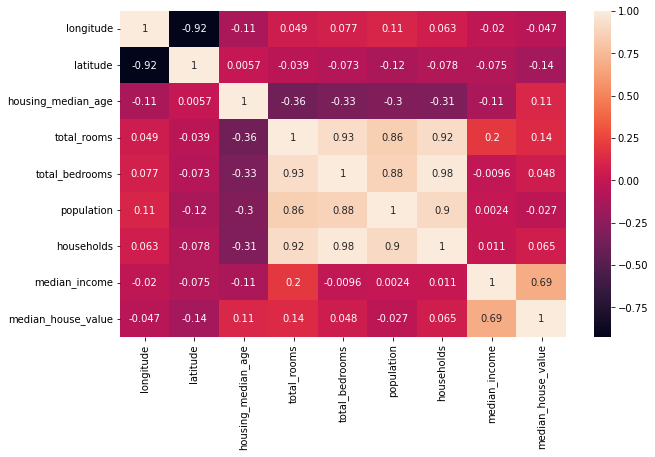

In [ ]:
# Visualización de la matrix de correlación
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

## Agregar nuevas variables

In [ ]:
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]


In [ ]:
corr_matrix = df_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

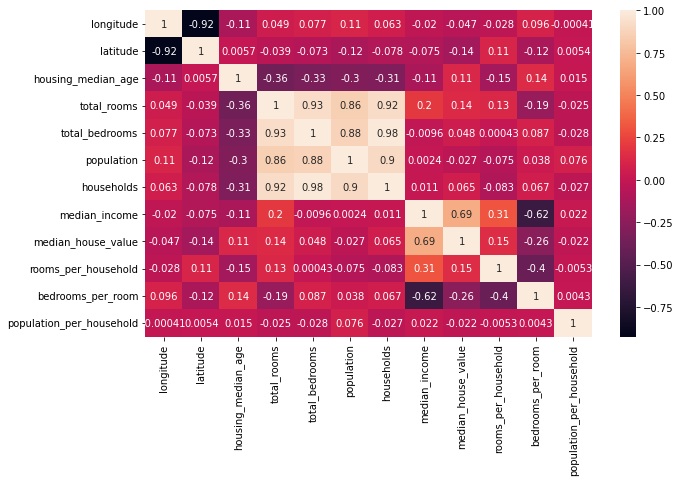

In [ ]:
# Visualización de la matrix de correlación
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Limpieza de datos

In [ ]:
df_train.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
income_cat                    0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

In [ ]:
#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()

In [ ]:
q=pd.DataFrame(q)

In [ ]:
q.isnull().sum()

total_bedrooms    0
dtype: int64

## Imputer

In [ ]:
df_train_num = df_train.drop("ocean_proximity", axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")
imp_mean = SimpleImputer( strategy='mean')

In [ ]:
imp_mean.fit(df_train_num)

SimpleImputer()

In [ ]:
imp_mean.statistics_

array([-1.19575635e+02,  3.56393144e+01,  2.86534036e+01,  2.62253979e+03,
        5.34914639e+02,  1.41968738e+03,  4.97011810e+02,  3.87588428e+00,
        2.07005322e+05,  3.00678295e+00,  5.44040595e+00,  2.12872772e-01,
        3.09646921e+00])

In [ ]:
df_train_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [ ]:
X = imp_mean.transform(df_train_num)


In [ ]:
X

array([[-121.46      ,   38.52      ,   29.        , ...,    5.48583569,
           0.20578363,    3.16855524],
       [-117.23      ,   33.09      ,    7.        , ...,    6.92708333,
           0.16071429,    2.62369792],
       [-119.04      ,   35.37      ,   44.        , ...,    5.39333333,
           0.19159456,    2.22333333],
       ...,
       [-122.72      ,   38.44      ,   48.        , ...,    4.11046512,
           0.23479491,    2.6627907 ],
       [-122.7       ,   38.31      ,   14.        , ...,    6.29740519,
           0.18383518,    2.41117764],
       [-122.14      ,   39.97      ,   27.        , ...,    5.47715736,
           0.20574606,    3.17258883]])

In [ ]:
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)


In [ ]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,2.0,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,5.0,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,2.0,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,2.0,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,3.0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,4.0,6.658342,0.184696,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,2.0,5.571932,0.179977,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,3.0,4.110465,0.234795,2.662791
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,3.0,6.297405,0.183835,2.411178


# Manejo de texto y atributos categoricos

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_train["ocean_proximity"].unique()

array(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [ ]:
housing_cat=df_train[["ocean_proximity"]]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


# Resumen de las transformaciones paso a paso




In [ ]:
# Read Data
data_link = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(data_link)

In [ ]:
# 1. Clasification 
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

df_ = df.copy()


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_, df_["income_cat"]):
 strat_train_set = df_.loc[train_index]
 strat_test_set = df_.loc[test_index]


In [ ]:
for set in (strat_train_set, strat_test_set):
 set.drop(["income_cat"], axis=1, inplace=True)

In [ ]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [ ]:
# 2 Add New variables to data
housing = strat_train_set.copy()
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


In [ ]:
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)


In [ ]:
housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,6.297405,0.183835,2.411178


In [ ]:
# Imputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(housing_num)
imp_mean.statistics_

array([-1.19575635e+02,  3.56393144e+01,  2.86534036e+01,  2.62253979e+03,
        5.34914639e+02,  1.41968738e+03,  4.97011810e+02,  3.87588428e+00,
        5.44040595e+00,  2.12872772e-01,  3.09646921e+00])

In [ ]:
X = imp_mean.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)


In [ ]:
housing_tr.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [ ]:
# 3. One hot encoder
housing_cat = housing[["ocean_proximity"]]
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [ ]:
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [ ]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

In [ ]:
df_cat_1hot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,1.0,0.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,1.0,0.0,0.0,0.0,0.0
16510,1.0,0.0,0.0,0.0,0.0


In [ ]:
housing_tr_ = housing_tr.join(df_cat_1hot)

## Escalamiento de variables

In [ ]:
cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]

In [ ]:
housing_scale=housing_tr_[cols]

In [ ]:
housing_scale

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.0,1.0,0.0,0.0,0.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,0.0,1.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.0,1.0,0.0,0.0,0.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,0.0,1.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.0,0.0,0.0,0.0,0.0
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,0.0,1.0,0.0,0.0,0.0
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,1.0,0.0,0.0,0.0,0.0
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

MinMaxScaler()

In [ ]:
X = scaler.transform(housing_scale)
X

array([[0.28784861, 0.63549416, 0.54901961, ..., 0.        , 0.        ,
        0.        ],
       [0.70916335, 0.05844846, 0.11764706, ..., 0.        , 0.        ,
        1.        ],
       [0.52888446, 0.30074389, 0.84313725, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1623506 , 0.62699256, 0.92156863, ..., 0.        , 0.        ,
        0.        ],
       [0.16434263, 0.61317747, 0.25490196, ..., 0.        , 0.        ,
        0.        ],
       [0.22011952, 0.78958555, 0.50980392, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

In [ ]:
len(housing_prepared)


16512

In [ ]:
len(housing_labels)

16512

In [ ]:
# Consideremos las siguientes columnas: 
cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income"]
housing_prep = housing_prepared[cols]

In [ ]:
housing_prep

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617
...,...,...,...,...,...,...,...,...
16507,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554
16508,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584
16509,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811
16510,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(housing_prep, housing_labels)
housing_predictions = model.predict(housing_prep)

In [ ]:
model.score(housing_prep, housing_labels)

0.6343991933140793

In [ ]:
#¿Como autmatizar todo el proceso?
#¿El modelo de regresion lineal es valido para lo construido, 
#que informacion nos da el score?
#¿Se puede mejorar agregando nuevas caracteristicas?
# ¿Puede ser ajustado a otro modelo?